<a href="https://colab.research.google.com/github/asegura1998/proyectoIA_grupo4/blob/main/Proyecto_detecci%C3%B3n_cancer_de_mama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Librerias


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb
from scipy.spatial import distance
%matplotlib inline
from sklearn import svm
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import classification_report

#Se carga el dataset
dataset = pd.read_csv("Breast_cancer_data.csv", sep=',',header=0)
#seleccionamos las columnas
X = dataset[['mean_radius','mean_texture','mean_perimeter','mean_area','mean_smoothness']]
#Se seleccional las etiquetas
y= dataset['diagnosis']

#entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Datos

In [ ]:
dataset.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


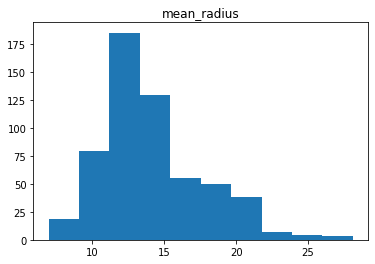

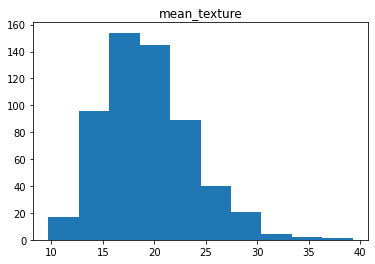

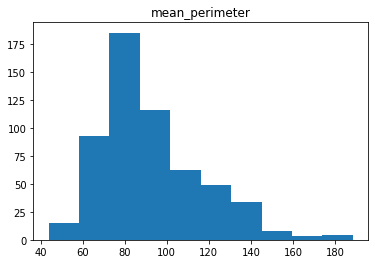

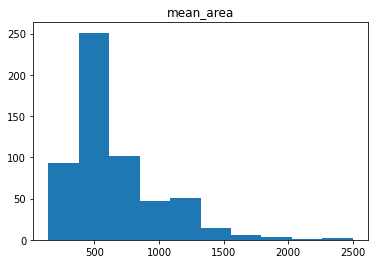

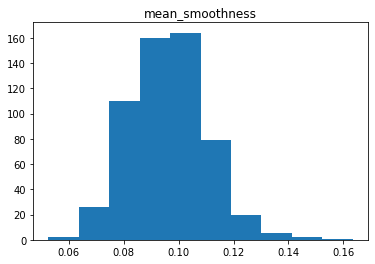

                 mean_radius  mean_texture  ...  mean_area  mean_smoothness
mean_radius         1.000000      0.323782  ...   0.987357         0.170581
mean_texture        0.323782      1.000000  ...   0.321086        -0.023389
mean_perimeter      0.997855      0.329533  ...   0.986507         0.207278
mean_area           0.987357      0.321086  ...   1.000000         0.177028
mean_smoothness     0.170581     -0.023389  ...   0.177028         1.000000

[5 rows x 5 columns]


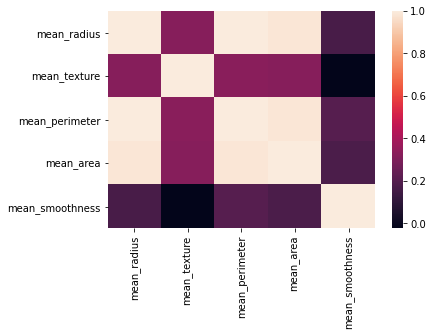

In [ ]:
for i in X.columns:
  plt.hist(X[i])
  plt.title(i)
  plt.show()
print(X.corr())
sb.heatmap(X.corr())

SVM


In [ ]:
#se define el algoritmo de SVM /lineal
kernels=['linear', 'poly', 'rbf', 'sigmoid']
#lineal
Kernel=0
msv = svm.SVC(kernel=kernels[Kernel])

#se entrena el modelo
msv.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

matthews_corrcoef 0.7587794026610946
Accuracy 0.8888888888888888


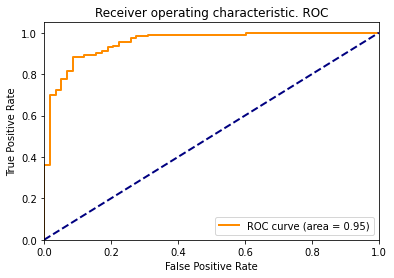

In [ ]:
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,roc_auc_score

y_test_predicted = msv.predict(X_test)
y_test_scores = msv.decision_function(X_test)
MCC = matthews_corrcoef(y_test, y_test_predicted)
print("matthews_corrcoef", MCC)
ACC = accuracy_score(y_test, y_test_predicted)
print("Accuracy", ACC)

fpr,tpr,thresholds = roc_curve(y_test, y_test_scores)
roc_auc=roc_auc_score(y_test, y_test_scores)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic. ROC')
plt.legend(loc="lower right")
plt.show()

Regresión logistica

In [ ]:
#se normalizan los datos

escalar = StandardScaler()
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

#se define la regresion logistica



LR = LogisticRegression()

#Se entrena el model
LR.fit(X_train, y_train)

#se realiza la prediccion
y_pred = LR.predict(X_test)
print(y_pred)

[0 0 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0
 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 0
 0 1 1 0 0 1 0 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1
 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 0 0 1 0 1 1 1 1 1 0 1 1 0 0 0 1 0 1 0 1 0 1]


Matriz de confusión: 
[[ 50   8]
 [  5 108]]
0.9310344827586207
matthews_corrcoef 0.8288982673112816
Accuracy 0.9239766081871345


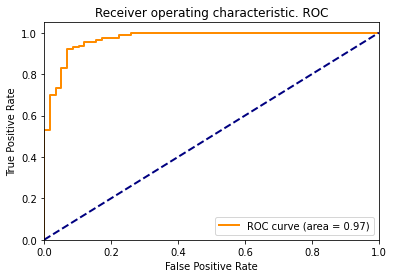

In [ ]:
#Utilizar metricas-matriz de confusion
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de confusión: ')
print(matriz)
#precision
precision = precision_score(y_test, y_pred)
print(precision)
#Se realiza el calculo de la ROc y de el coeficiente de correlacion de matthews directo en al dataset
y_test_predicted = LR.predict(X_test)
y_test_scores = LR.predict_proba(X_test)
MCC = matthews_corrcoef(y_test, y_pred)
print("matthews_corrcoef", MCC)
ACC = accuracy_score(y_test, y_pred)
print("Accuracy", ACC)
"""
print(y_test_scores[:,1])
print(y_test_predicted)
"""
fpr,tpr,thresholds = roc_curve(y_test, y_test_scores[:,1])
roc_auc=roc_auc_score(y_test, y_test_scores[:,1])
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic. ROC')
plt.legend(loc="lower right")
plt.show()

KNN

In [ ]:
#llamo clasificador
n_neighbors = 10
distance='minkowski'
knn = KNeighborsClassifier(n_neighbors,weights='uniform',metric=distance, metric_params=None,algorithm='brute')
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.88
Accuracy of K-NN classifier on test set: 0.91


In [ ]:
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[ 50   9]
 [  7 105]]
              precision    recall  f1-score   support

           0       0.88      0.85      0.86        59
           1       0.92      0.94      0.93       112

    accuracy                           0.91       171
   macro avg       0.90      0.89      0.90       171
weighted avg       0.91      0.91      0.91       171



([<matplotlib.axis.XTick at 0x7f28f5ef6780>,
 <a list of 5 Text major ticklabel objects>)

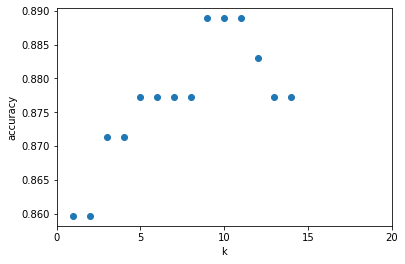

In [ ]:
k_range = range(1, 15)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k,weights='distance',metric=distance, metric_params=None,algorithm='brute')
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

RED NEURONAL

In [ ]:
#normalizacion de los datos
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#Llamo red neuronal
mlp=MLPClassifier(hidden_layer_sizes=(10,10,10), max_iter=500, alpha=0.0001, solver='adam', random_state=21,tol=0.000000001)
mlp.fit(X_train,y_train)
predictions=mlp.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))
print(predictions)

[[ 51   8]
 [  5 107]]
              precision    recall  f1-score   support

           0       0.91      0.86      0.89        59
           1       0.93      0.96      0.94       112

    accuracy                           0.92       171
   macro avg       0.92      0.91      0.91       171
weighted avg       0.92      0.92      0.92       171

[1 1 1 0 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1
 1 1 1 1 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 0 1 1
 1 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0
 1 1 1 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 0 1 1
 1 1 1 1 1 1 0 0 1 0 1 0 1 1 0 1 0 0 1 0 1 1 1]


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
